Link do notatnika: https://colab.research.google.com/drive/1ZVyr50r5NfUcjYM5bjdtNlYTePPzjyVG?usp=sharing
---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.decomposition import PCA
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/Iris.csv"
glass_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/glass.data"
seeds_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/seeds_dataset.txt"

y1 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/1year.arff"
y2 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/2year.arff"
y3 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/3year.arff"
y4 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/4year.arff"
y5 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/5year.arff"

1. Czy przy grupowaniu potrzebna jest normalizacja/standaryzacja danych?
2. Co różni oba algorytmy z punktu widzenia reprezentacji klastra?
3. (ad. 2.) Jaką konsekwencję mają te różnice na możliwości wykonywania „predykcji”?
4. Który z algorytmów jest mniej odporny na szum i wartości odstające (ang. outliers)?
Dlaczego?
5. Czy w zadaniu grupowania powinniśmy użyć walidacji krzyżowej?
6. Czy wyniki badanych algorytmów klasteryzacji powinny być powtarzane i uśredniane?
7. Co mierzą miary klasteryzacji podane w treści zdania?
8. Czy podejście aby liczba klastrów i liczba klas była taka sama jest poprawne
w kontekście miary purity?

**Podsumowanie**

K-means:
- n_clusters: liczba klastrów brana pod uwagę
- n_init: ilość uruchomień algorytmu z różnymi położeniami centroid
- max_iter: ilość iteracji dążących do znalezienia najlepszym położeń centroidów

DBSCAN:
- eps: max odległość między punktami, by zostały sąsiadami
- min_samples: minimalna liczba punktów, któraa określa punkt rdzeniowy. Ten parametr wpływa na to, jak dużo punktów musi być w pobliżu, aby utworzyć skupisko.
- metric: sposób mierzenia odległości



---



Miary grupowanie (bez etykiet):
- *Silhouette*: obliczaj średnią wartość dla każdego punktu danych. Wykorzystuje odległość między punktem punktami w tym samym klastrze oraz w najbliższym klastrze. **Im większa wartość Silhouette, tym lepsza klastryzacj**a. Zakres wartości Silhouette mieści się między -1 a 1, gdzie wartości bliskie 1 wskazują na dobrze zdefiniowane klastry, a wartości bliskie -1 oznaczają, że punkt jest źle przypisany do klastra.
- *Davies-Bouldin Index*: oblicza stopień podobieństwa między klastrami na podstawie średniej odległości między punktami w klastrze i odległością między centroidami klastrów. Niska wartość Davies-Bouldin Index wskazuje na dobrze rozdzielone i jednorodne klastry. **Im mniejsza wartość, tym lepsza klastryzacja**.

Miary grupowanie (z etykietami):
- Rand Index: porównuje podobieństwo między rzeczywistymi etykietami danych a przypisanymi przez algorytm klastrami. Mierzy, w jakim stopniu punkty są poprawnie przypisane do tych samych klastrów w obu zestawach etykiet. Wartość Rand Index wynosi od 0 do 1, gdzie wartość 1 oznacza idealne dopasowanie etykiet.
- Purity: Oblicza ona procent punktów przypisanych do najczęstszej etykiety w klastrze. Im wyższa wartość Purity, tym lepsza jakość klastryzacji. Purity jest miarą stosowaną w problemach, gdzie istnieje znana etykieta dla każdego punktu danych.



---




## Wyniki dla zbioru SEEDS:




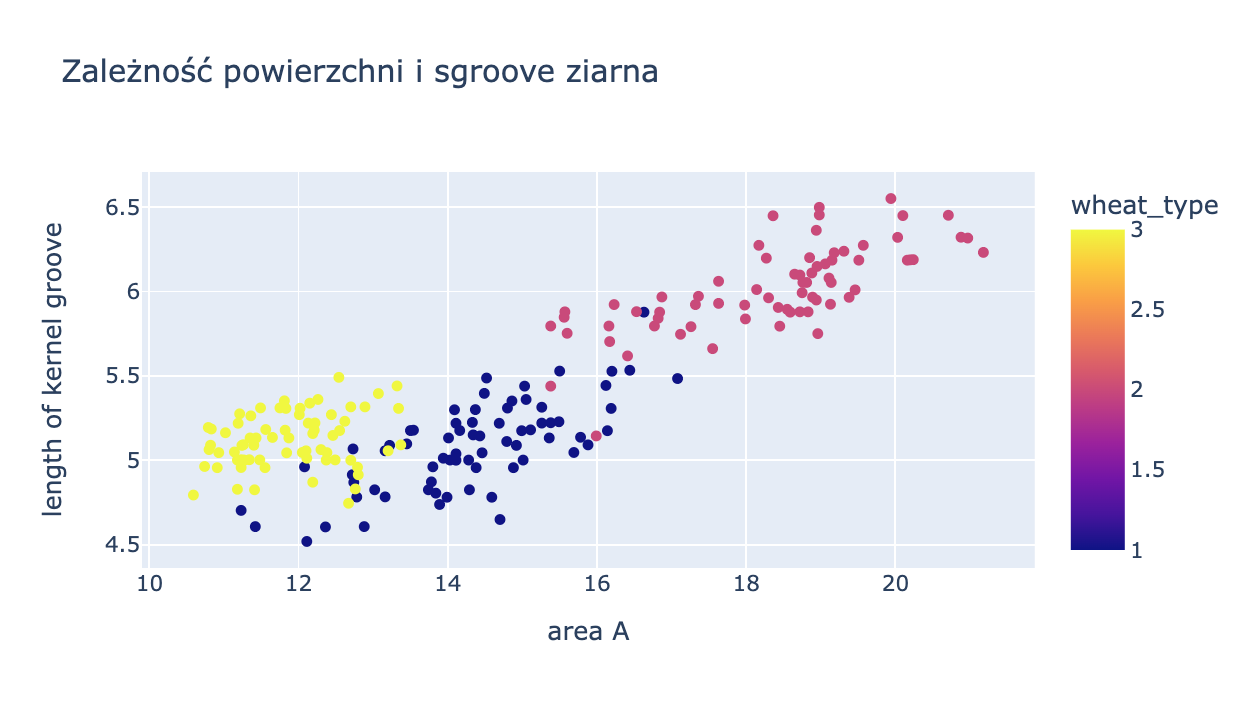

### K-means:

Dla 3 klastrów :
- silhouette: 0.40072705527512986,
- davies_bouldin: 0.9278712249013426
- Rand=0.7732937360806309
- Purity=0.919047619047619


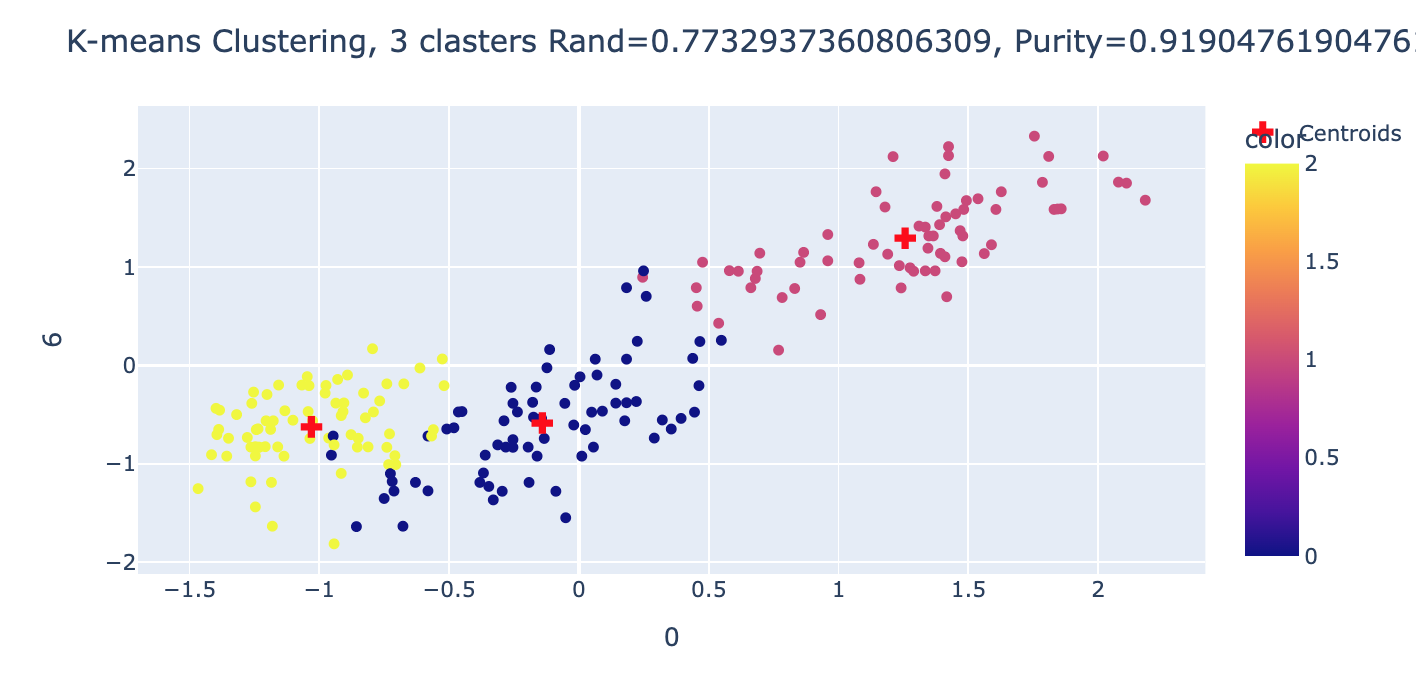

Dla 2 klastrów:
- silhouette: 0.46577247686580914,
- davies_bouldin: 0.7968788694686015
- Rand=0.4805275822119241
- Purity=0.6571428571428571

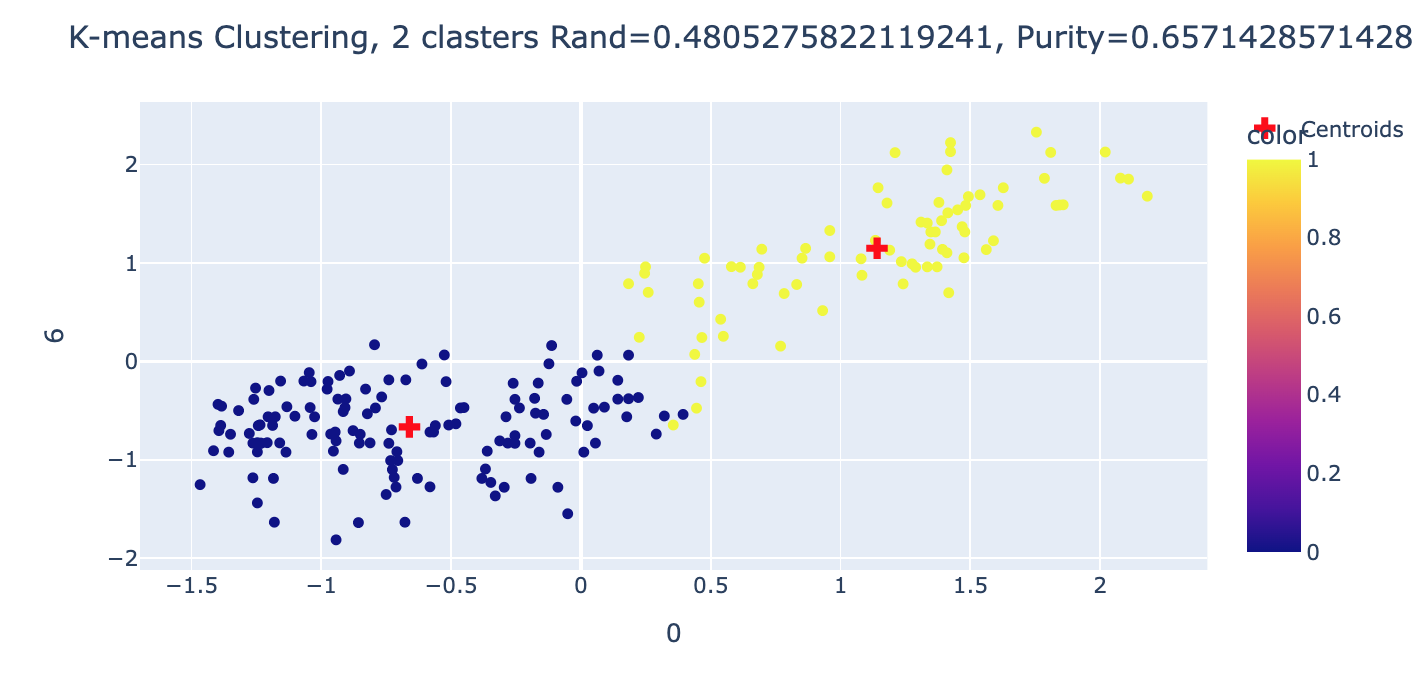

### DBSCAN

- Number of clusters: 6
- silhouette: 0.21737754278863494,
- davies_bouldin: 3.4033557384744664
- Rand=0.4617963896365286
- Purity=0.819047619047619

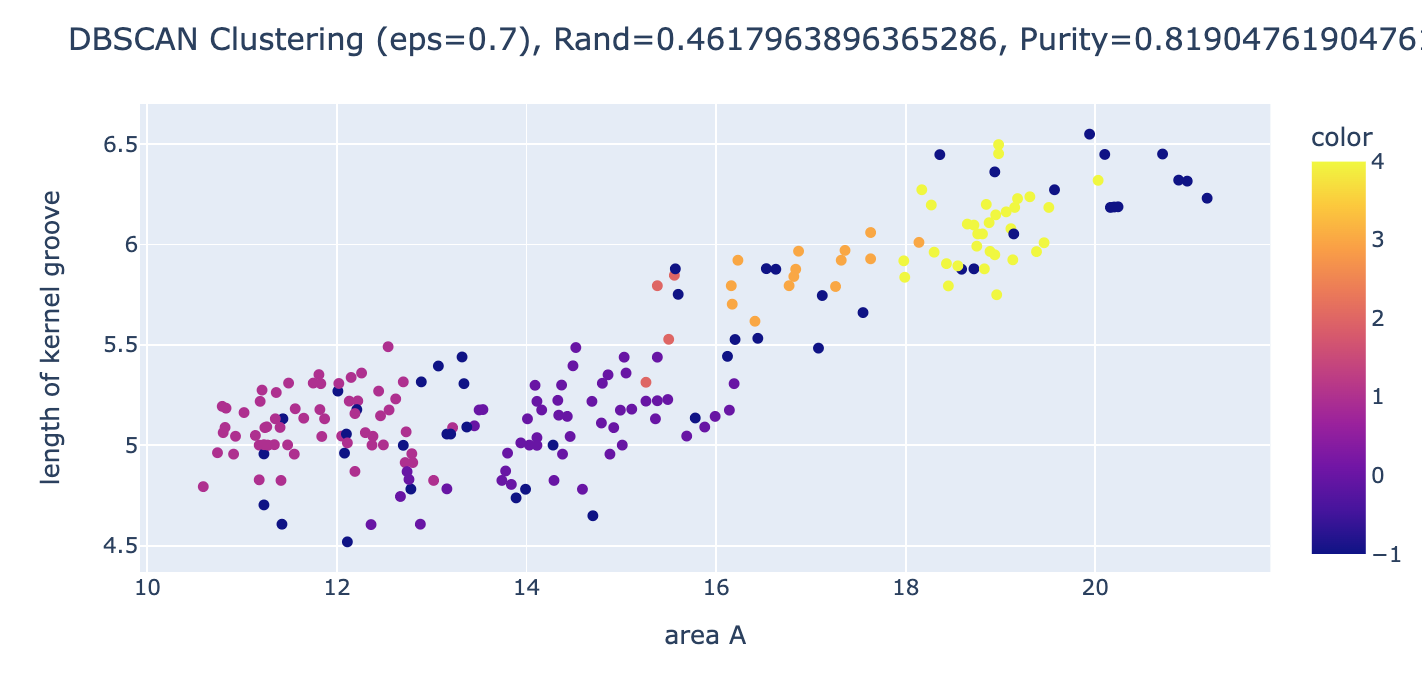



---


# k-means

In [ ]:
pipe = Pipeline([('kmeans', KMeans())])

param_grid = {
    "n_clusters": [2,3,4,5,6,7,8,9,10],
    "n_init": [7, 8, 9, 10, 11, 14],
    "max_iter": [100, 200, 300, 400]
}

In [ ]:
def calculate_purity(y_true, y_pred, n):
    contingency_matrix = np.zeros((n, n))
    for true_label, pred_label in zip(y_true, y_pred):
        contingency_matrix[int(true_label)][int(pred_label)] += 1
    purity = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    return purity

## Iris

In [ ]:
iris = pd.read_csv(iris_path)
iris = iris.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
fig = px.scatter(iris, x = "SepalLengthCm", y = "SepalWidthCm", color = "Species",
                 width=700, height=400, title="Zależność długość i szerokości kielicha")
fig.show()

In [ ]:
pd.value_counts(iris['Species'])  #Sprawdzenie rozkładu klas

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
y = iris.pop('Species')
X = iris

In [ ]:
ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1)).ravel()

In [ ]:
# n_clusters dla miary RAND
clusters = param_grid['n_clusters']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_clusters=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_clusters'])
fig = px.scatter(scored_df, x = 'n_clusters', y="score", title='n_clusters scores (rand)')
fig.show()

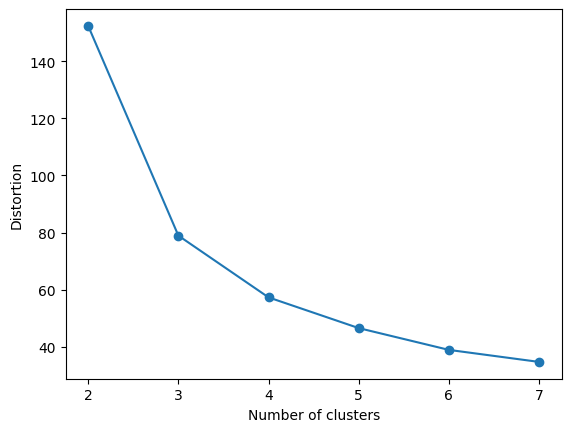

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
for c in param_grid['n_clusters']:
    km = KMeans(
        n_clusters=c, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(param_grid['n_clusters'], distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)
print("Adjusted Rand Index:", rand_index)

purity = calculate_purity(y_encoded, labels)
print("Purity:", purity)

Adjusted Rand Index: 0.5399218294207123
Purity: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
fig = px.scatter(X, x='PetalLengthCm', y='PetalWidthCm', color=labels)
fig.update_layout(title='K-means Clustering')
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)
print("Adjusted Rand Index:", rand_index)

purity = calculate_purity(y_encoded, labels)
print("Purity:", purity)

Adjusted Rand Index: 0.7302382722834697
Purity: 0.8933333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
fig = px.scatter(X, x='PetalLengthCm', y='PetalWidthCm', color=labels)
fig.update_layout(title='K-means Clustering')
fig.show()

## GLASS

In [ ]:
glass = pd.read_csv(glass_path, header=None)
glass.columns = ['Id' ,'RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_type']
glass = glass.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
pd.value_counts(glass['Glass_type'])  #Sprawdzenie rozkładu klas

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_type, dtype: int64

In [ ]:
fig = px.scatter(glass, x = "Na", y = "Mg", color = "Glass_type",
                 width=800, height=500,
                 title="Wykres zależności ilości Magnezu od sodu i wpływ na typ szkła")
fig.show()

In [ ]:
y = glass.pop('Glass_type')
# scaler = StandardScaler()

X = glass
# X=scaler.fit_transform(X)

ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1)).ravel()

### n_clasters

In [ ]:
# n_clusters dla miary RAND
clusters = param_grid['n_clusters']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_clusters=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_clusters'])
fig = px.scatter(scored_df, x = 'n_clusters', y="score", title='n_clusters scores (rand)',
                 width=700, height=400)
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
labels = kmeans.labels_

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)

purity = calculate_purity(y_encoded, labels, 6)

fig = px.scatter(X, x='Na', y='Mg', color=labels)
fig.update_layout(title=f'K-means Clustering, 6 clasters Rand={rand_index}, Purity={purity}',
                  width=700, height=400)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)

purity = calculate_purity(y_encoded, labels, 6)

fig = px.scatter(X, x='Na', y='Mg', color=labels)
fig.update_layout(title=f'K-means Clustering, 4 clasters Rand={rand_index}, Purity={purity}',
                  width=700, height=400)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### n_init

In [ ]:
# n_init dla miary RAND
clusters = param_grid['n_init']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_clusters=6,n_init=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_init'])
fig = px.scatter(scored_df, x = 'n_init', y="score", title='n_init scores (rand)',
                 width=700, height=400)
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=6, n_init=9)
kmeans.fit(X)
labels = kmeans.labels_

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)

purity = calculate_purity(y_encoded, labels, 6)

print(f'for n_init=9 Rand index={rand_index}, purity={purity}')

for n_init=9 Rand index=0.2701945438613878, purity=0.5887850467289719


### max_iter

In [ ]:
# max_iter dla miary RAND
clusters = param_grid['max_iter']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_clusters=6,max_iter=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'max_iter'])
fig = px.scatter(scored_df, x = 'max_iter', y="score", title='max_iter scores (rand)',
                 width=700, height=400)
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=6, n_init=9, max_iter=200)
kmeans.fit(X)
labels = kmeans.labels_

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)

purity = calculate_purity(y_encoded, labels, 6)

print(f'for n_init=9 Rand index={rand_index}, purity={purity}')

for n_init=9 Rand index=0.27388540329969263, purity=0.5887850467289719


## SEEDS

In [ ]:
seeds = pd.read_csv(seeds_path, delimiter='\t' ,header=None)
seeds.columns = ['area A' ,'perimeter P','compactness C', 'length of kerne',
                 'width of kernel', 'asymmetry coefficient',
                 'length of kernel groove', 'wheat_type']
# glass = glass.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
seeds.head()

,area A,perimeter P,compactness C,length of kerne,width of kernel,asymmetry coefficient,length of kernel groove,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
fig = px.scatter(seeds, x = "area A", y = "length of kernel groove", color = "wheat_type",
                 width=700, height=400, title="Zależność powierzchni i sgroove ziarna")
fig.show()

In [ ]:
pd.value_counts(seeds['wheat_type'])  #Sprawdzenie rozkładu klas

1    70
2    70
3    70
Name: wheat_type, dtype: int64

In [ ]:
y = seeds.pop('wheat_type')
scaler = StandardScaler()

X = seeds
X=scaler.fit_transform(X)
ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1)).ravel()

### n_clasters

In [ ]:
# n_clusters dla miary RAND
clusters = param_grid['n_clusters']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_clusters=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_clusters'])
fig = px.scatter(scored_df, x = 'n_clusters', y="score", title='n_clusters scores (rand)',
                 width=700, height=400)
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  #centroids

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)
purity = calculate_purity(y_encoded, labels, 3)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)


fig = px.scatter(X, x = 0, y = 6, color=labels,
                 width=800, height=400)
fig.add_scatter(x=centroids[:, 0], y=centroids[:, 6], mode='markers',
                marker=dict(color='red', size=10, symbol='cross'),
                name='Centroids')

fig.update_layout(title=f'K-means Clustering, 3 clasters Rand={rand_index}, Purity={purity}')
print(f'silhouette: {silhouette},\ndavies_bouldin: {davies_bouldin}\nRand={rand_index}\nPurity={purity}')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



silhouette: 0.40072705527512986,
davies_bouldin: 0.9278712249013426
Rand=0.7732937360806309
Purity=0.919047619047619


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  #centroids

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)
purity = calculate_purity(y_encoded, labels, 3)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)

fig = px.scatter(X, x = 0, y = 6, color=labels,
                 width=800, height=400)

fig.add_scatter(x=centroids[:, 0], y=centroids[:, 6], mode='markers',
                marker=dict(color='red', size=10, symbol='cross'),
                name='Centroids')

fig.update_layout(title=f'K-means Clustering,  clasters Rand={rand_index}, Purity={purity}')
print(f'silhouette: {silhouette},\ndavies_bouldin: {davies_bouldin}\nRand={rand_index}\nPurity={purity}')

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



silhouette: 0.46577247686580914,
davies_bouldin: 0.7968788694686015
Rand=0.4805275822119241
Purity=0.6571428571428571


### n_init


In [ ]:
# n_init dla miary RAND
clusters = param_grid['n_init']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_init=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_init'])
fig = px.scatter(scored_df, x = 'n_init', y="score", title='n_init scores (rand)')
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=7)
kmeans.fit(X)
labels = kmeans.labels_

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)

purity = calculate_purity(y_encoded, labels, 3)

print(f'for n_init=9 Rand index={rand_index}, purity={purity}')

for n_init=9 Rand index=0.7166198557361053, purity=0.8952380952380953


### max iter

In [ ]:
# max_iter dla miary RAND
clusters = param_grid['max_iter']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(max_iter=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'max_iter'])
fig = px.scatter(scored_df, x = 'max_iter', y="score", title='max_iter scores (rand)')
fig.show()

# DBSCAN

In [ ]:
param_grid = {
    "eps": [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "min_samples": [3, 4, 5, 6, 7, 8, 9, 10, 11],
    "metric": ["euclidean", "manhattan"]
}

## GLASS

In [ ]:
glass = pd.read_csv(glass_path, header=None)
glass.columns = ['Id' ,'RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_type']
glass = glass.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
fig = px.scatter(glass, x = "Na", y = "Mg", color = "Glass_type",
                 width=800, height=500,
                 title="Wykres zależności ilości Magnezu od sodu i wpływ na typ szkła")
fig.show()

In [ ]:
y = glass.pop('Glass_type')
X = glass

ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1)).ravel()


### eps

In [ ]:
# eps dla miary RAND
eps = param_grid['eps']
results_n = []
scr = []

for c in eps:
  dbscan = DBSCAN(eps=c)
  dbscan.fit(X)
  labels = dbscan.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'eps'])
fig = px.scatter(scored_df, x = 'eps', y="score", title='eps scores (rand)', width=700, height=400)
fig.show()

In [ ]:
dbscan = DBSCAN(eps=1)
dbscan.fit(X)
labels = dbscan.labels_

count = len(np.unique(labels))
print(f'clusters number: {count}')

rand_index = adjusted_rand_score(y, labels)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)


fig = px.scatter(X, x = "Na", y = "Mg", color=labels,
                 width=800, height=400)

fig.update_layout(title=f'DBSCAN Clustering (eps=1), Rand={rand_index}')
print(f'silhouette: {silhouette},\ndavies_bouldin: {davies_bouldin}\nRand={rand_index}\n')
fig.show()

clusters number: 4
silhouette: 0.3109115273875989,
davies_bouldin: 1.9414497079682942
Rand=0.284458577800376



### min_samples

In [ ]:
# min_samples dla miary RAND
min_samples = param_grid['min_samples']
results_n = []
scr = []

for c in min_samples:
  dbscan = DBSCAN(min_samples=c, eps=1)
  dbscan.fit(X)
  labels = dbscan.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'min_samples'])
fig = px.scatter(scored_df, x = 'min_samples', y="score", title='min_samples scores (rand)',
                 width=800, height=400)
fig.show()

### metric

In [ ]:
# metric dla miary RAND
metric = param_grid['metric']
results_n = []
scr = []

for c in metric:
  dbscan = DBSCAN(min_samples=3, eps=1, metric=c)
  dbscan.fit(X)
  labels = dbscan.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'metric'])
fig = px.scatter(scored_df, x = 'metric', y="score", title='metric scores (rand)',
                 width=600, height=400)
fig.show()

## SEEDS

In [ ]:
seeds = pd.read_csv(seeds_path, delimiter='\t' ,header=None)
seeds.columns = ['area A' ,'perimeter P','compactness C', 'length of kerne',
                 'width of kernel', 'asymmetry coefficient',
                 'length of kernel groove', 'wheat_type']
# glass = glass.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
y = seeds.pop('wheat_type')

X = seeds
ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1)).ravel()

### eps

In [ ]:
# eps dla miary RAND
eps = param_grid['eps']
results_n = []
scr = []

for c in eps:
  dbscan = DBSCAN(eps=c)
  dbscan.fit(X)
  labels = dbscan.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'eps'])
fig = px.scatter(scored_df, x = 'eps', y="score", title='eps scores (rand)',
                 width=700, height=400)
fig.show()

### min_samples

In [ ]:
# min_samples dla miary RAND
min_samples = param_grid['min_samples']
results_n = []
scr = []

for c in min_samples:
  dbscan = DBSCAN(min_samples=c, eps=0.7)
  dbscan.fit(X)
  labels = dbscan.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'min_samples'])
fig = px.scatter(scored_df, x = 'min_samples', y="score", title='min_samples scores (rand)',
                 width=700, height=400)
fig.show()

### metric

In [ ]:
# metric dla miary RAND
metric = param_grid['metric']
results_n = []
scr = []

for c in metric:
  dbscan = DBSCAN(min_samples=4, eps=0.7, metric=c)
  dbscan.fit(X)
  labels = dbscan.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'metric'])
fig = px.scatter(scored_df, x = 'metric', y="score", title='metric scores (rand)',
                 width=400, height=400)
fig.show()

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=4)
dbscan.fit(X)
labels = dbscan.labels_

count = len(np.unique(labels))
print(f'Number of clusters: {count}')
rand_index = adjusted_rand_score(y, labels)
purity = calculate_purity(y_encoded, labels, count)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)


fig = px.scatter(X, x = "area A", y = "length of kernel groove", color=labels,
                 width=800, height=400)

fig.update_layout(title=f'DBSCAN Clustering (eps=0.7), Rand={rand_index}, Purity={purity}')
print(f'silhouette: {silhouette},\ndavies_bouldin: {davies_bouldin}\nRand={rand_index}\nPurity={purity}')
fig.show()

Number of clusters: 6
silhouette: 0.21737754278863494,
davies_bouldin: 3.4033557384744664
Rand=0.4617963896365286
Purity=0.819047619047619


# **PCB**

In [ ]:
#Ładowanie 5 zbiorów do DF
from scipy.io.arff import loadarff

y1_raw = loadarff(y1)
bank_y1 = pd.DataFrame(y1_raw[0])

y2_raw = loadarff(y2)
bank_y2 = pd.DataFrame(y2_raw[0])

y3_raw = loadarff(y3)
bank_y3 = pd.DataFrame(y3_raw[0])

y4_raw = loadarff(y4)
bank_y4 = pd.DataFrame(y4_raw[0])

y5_raw = loadarff(y5)
bank_y5 = pd.DataFrame(y5_raw[0])

In [ ]:
# Łączenie w 1 DF
frames = [bank_y1, bank_y2, bank_y3, bank_y4, bank_y5]
bank_all = pd.concat(frames, ignore_index=True)

In [ ]:
bank_all = bank_all.drop(columns=['Attr37'])

In [ ]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer_mean.fit(bank_all)

bank_all = pd.DataFrame(imputer.transform(bank_all), columns=bank_all.columns)

In [ ]:
encoder = OrdinalEncoder()

bank_all["class"] = encoder.fit_transform(bank_all[["class"]])

In [ ]:
bank_all.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [ ]:
pd.value_counts(bank_all['class'])

0.0    41314
1.0     2091
Name: class, dtype: int64

In [ ]:
fig = px.scatter(bank_all, x = "Attr1", y = "Attr2", color = "class",
                 width=700, height=400, title="Zależność Attr1 od Attr2")
fig.show()

In [ ]:
classes = [int(0.0), int(1.0)]
features = X.columns

In [ ]:
y = bank_all.pop('class')
X = bank_all

In [ ]:
clusters = param_grid['n_clusters']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_clusters=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  # silhouette = silhouette_score(X, labels)
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_clusters'])
fig = px.scatter(scored_df, x = 'n_clusters', y="score", title='n_clusters scores (rand)',
                 width=700, height=400)
fig.show()

In [ ]:
# n_init dla miary RAND
clusters = param_grid['n_init']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_init=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_init'])
fig = px.scatter(scored_df, x = 'n_init', y="score", title='n_init scores (rand)',
                 width=700, height=400)
fig.show()

In [ ]:
# max_iter dla miary RAND
clusters = param_grid['max_iter']
results_n = []
scr = []

for c in clusters:
  kmeans = KMeans(n_init=c)
  kmeans.fit(X)
  labels = kmeans.labels_
  rand_index = adjusted_rand_score(y, labels)
  scr.append([rand_index, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'max_iter'])
fig = px.scatter(scored_df, x = 'max_iter', y="score", title='max_iter scores (rand)',
                 width=700, height=400)
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=11)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  #centroids

y_km = kmeans.predict(X)

rand_index = adjusted_rand_score(y, labels)
purity = calculate_purity(y_encoded, labels, 3)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)


fig = px.scatter(X, x = 'Attr1', y = 'Attr2', color=labels,
                 width=800, height=400)
fig.add_scatter(x=centroids[:, 0], y=centroids[:, 6], mode='markers',
                marker=dict(color='red', size=10, symbol='cross'),
                name='Centroids')

fig.update_layout(title=f'K-means Clustering, 10 clasters Rand={rand_index}, Purity={purity}')
print(f'silhouette: {silhouette},\ndavies_bouldin: {davies_bouldin}\nRand={rand_index}\nPurity={purity}')
fig.show()

silhouette: 0.980553127741836,
davies_bouldin: 0.34936015466054254
Rand=0.003590384618499405
Purity=0.3333333333333333
